# Rankeo de *leads*.

Imagina que trabajas para un banco y este banco ofrece inversiones a plazo fijo a sus clientes. Como parte de una campaña para ampliar la cantidad de inversiones a plazo fijo que sus clientes han adquirido, la compañía utiliza diversos métodos de contacto, entre los cuales el teléfono es todavía una de las formas más efectivas.

Al banco le encantaría llamar a todos sus clientes, sin embargo, esto no es posible porque el call center no se da abasto y es importante priorizar a quienes hay que llamar para garantizar el máximo número de conversiones.

**Tu tarea es encontrar una forma de clasificar y rankear (ordenar) las llamadas de tal modo que los agentes del centro de llamadas, llame primero a quien tiene más probabilidades de depositar su dinero.**

![](https://ik.imagekit.io/thatcsharpguy/projects/codigo-facilito/machine-learning/deposito-header.jpg?ik-sdk-version=javascript-1.4.3&updatedAt=1669051927251)

## Código

### [https://github.com/fferegrino/cf-ml/tree/main/term-deposit](https://github.com/fferegrino/cf-ml/tree/main/term-deposit)

## Dataset

Este dataset es una versión modificada de [Term Deposit Prediction Data Set](https://www.kaggle.com/datasets/brajeshmohapatra/term-deposit-prediction-data-set) disponible en Kaggle.



## Solución  

La empresa tiene información de clientes anteriores que en algún momento han sido contactados en el pasado comprar la inversión en el pasado sin importar si lo compraron o no. Esta información está contenida en el archivo `train.csv`.

Así mismo, para ayudarte hay un archivo llamado `test.csv` con datos de otros clientes pero que deberás usar para probar tus resultados.

**Como no tenemos más información más allá de si un cliente compró o no compró, vamos a utilizar las probabilidades que nos de un modelo de clasificación para decidir quién tiene más probabilidades de convertir**.

Este problema se conoce como *lead scoring*.

### Descripción de los datos

| Variable     | Definición                                                              |
|--------------|-------------------------------------------------------------------------|
| *ID*         | Identificador único del cliente                                         |
| *age*        | Edad del cliente                                                        |
| *job*        | Trabajo que desempeña el cliente                                        |
| *marital*    | Estado marital del cliente                                              |
| *education*  | Nivel de educación del cliente                                          |
| *default*    | Especifica si el cliente tiene una deuda no pagada                      |
| *balance*    | Saldo promedio anual del cliente                                        |
| *housing*    | Indica si el cliente tiene una hipoteca con el banco                    |
| *loan*       | Indica si el cliente tiene un préstamo personal                         |
| *contact*    | El medio por el cual se ha estado contactando al cliente                |
| *month*      | El mes en el que se contactó al cliente                                 |
| *day*        | El día en el que se contactó al cliente                                 |
| *duration*   | Duración del contacto con el cliente                                    |
| *campaign*   | El número de veces que el banco se ha puesto en contacto con el cliente |
| *pdays*      | Número de días que han transcurrido desde el último contacto            |
| *previous*   | Número de veces que se ha contactado al cliente antes de esta campaña   |
| *poutcome*   | Si el cliente ha comprado productos como resutlado de la campaña previa |
| *subscribed* | Si el cliente se suscribió como resultado de la campaña más reciente    |


In [98]:
import pandas as pd
import numpy as np

In [99]:
train = pd.read_csv('train.csv')
train.sample(20)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1788,20836,60,blue-collar,married,primary,no,0,no,yes,cellular,13,aug,324,4,-1,0,unknown,no
31109,20994,56,technician,married,secondary,no,2065,no,no,cellular,14,aug,71,2,-1,0,unknown,no
25895,39880,33,services,divorced,secondary,no,1117,no,no,cellular,2,jun,417,1,-1,0,unknown,yes
27981,38489,27,blue-collar,single,secondary,no,940,yes,no,cellular,15,may,141,1,343,3,failure,no
30090,26750,32,technician,married,tertiary,no,1352,no,no,cellular,20,nov,221,3,-1,0,unknown,no
4603,900,43,blue-collar,married,secondary,no,167,yes,no,unknown,7,may,243,1,-1,0,unknown,no
27841,42315,43,management,married,tertiary,no,3186,no,no,cellular,16,nov,380,1,88,1,failure,yes
18171,7880,52,blue-collar,married,primary,no,2439,yes,no,unknown,30,may,212,3,-1,0,unknown,no
16989,37347,44,management,single,secondary,no,-228,yes,yes,cellular,13,may,38,1,362,2,failure,no
21705,19486,40,technician,married,secondary,no,1076,no,no,cellular,7,aug,326,2,-1,0,unknown,no


In [100]:
from pandas_profiling import ProfileReport
import seaborn as sns

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\cajiv\OneDrive\env_python\cienciadatos\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


KeyboardInterrupt: 

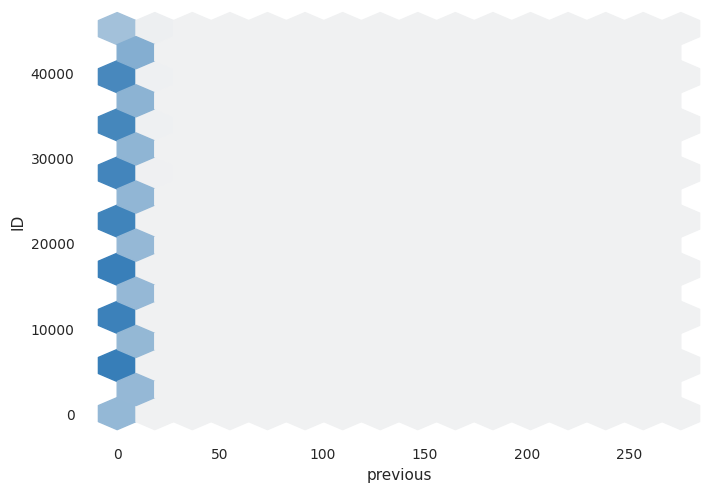

In [101]:
profile = ProfileReport(train, title='Raw Deposit Analysis', explorative=True)
profile.to_file('deposit-report.html')

Text(0.5, 1.0, 'Target variable distribution\nNo: 27932 (88.26%) | Yes: 3715 (11.74%) ')

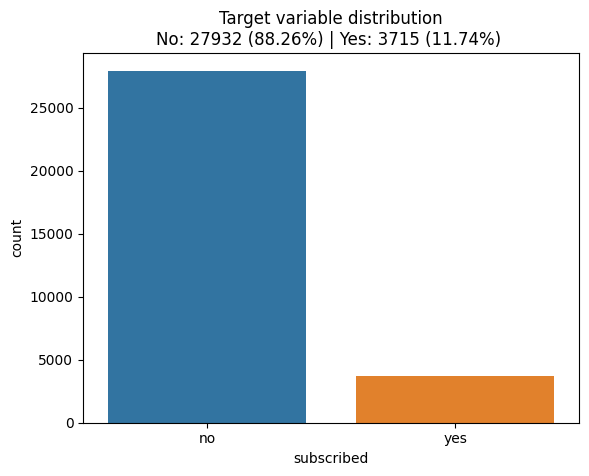

In [ ]:
%matplotlib inline

subscribed_proportion = (train['subscribed'].value_counts()).to_dict()
ax = sns.countplot(x=train["subscribed"])
title = ("Target variable distribution\n"
    f"No: {subscribed_proportion['no']} ({(subscribed_proportion['no']/len(train)):0.2%}) |"
    f" Yes: {subscribed_proportion['yes']} ({(subscribed_proportion['yes']/len(train)):0.2%}) " )
ax.set_title(title)




In [ ]:
train.drop(['ID'], axis='columns', inplace=True)


feature engineering

In [ ]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
marital_encoder = OneHotEncoder()

marital_encoder.fit(train[['marital']])

OneHotEncoder()

In [ ]:
encoded_marital = marital_encoder.transform(train[['marital']])
encoded_marital.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
encoded_marital = pd.DataFrame(encoded_marital.toarray(), columns=marital_encoder.categories_)
encoded_marital['original_value'] = train['marital']
encoded_marital

,divorced,married,single,original_value
0,0.0,1.0,0.0,married
1,0.0,1.0,0.0,married
2,0.0,1.0,0.0,married
3,1.0,0.0,0.0,divorced
4,0.0,1.0,0.0,married
...,...,...,...,...
31642,0.0,0.0,1.0,single
31643,1.0,0.0,0.0,divorced
31644,0.0,0.0,1.0,single
31645,0.0,1.0,0.0,married


# Binning

In [ ]:
from custom_transformers import CutTransformer

In [ ]:
age_bin = CutTransformer(bins = [0, 20, 30, 40, 50, 60, 1000], as_str=True)

In [ ]:
age_frame = train[['age']].copy()
age_bin.fit(age_frame[['age']])

age_encoded = age_bin.fit_transform(age_frame[['age']])
age_frame['age_encoded'] = age_encoded

In [ ]:
age_frame

,age,age_encoded
0,56,"(50, 60]"
1,31,"(30, 40]"
2,27,"(20, 30]"
3,57,"(50, 60]"
4,31,"(30, 40]"
...,...,...
31642,29,"(20, 30]"
31643,53,"(50, 60]"
31644,32,"(30, 40]"
31645,57,"(50, 60]"


In [ ]:
age_one_hot_encoder = OneHotEncoder()

In [ ]:
age_one_hot_encoder.fit(age_frame[['age_encoded']])

OneHotEncoder()

In [ ]:
age_one_hot_encoder.transform(age_frame[['age_encoded']]).toarray()

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [ ]:
oh_age = age_one_hot_encoder.transform(age_frame[['age_encoded']]).toarray()

In [ ]:
one_hot_encoded_ages = pd.DataFrame(
    oh_age,
    columns=age_one_hot_encoder.categories_
)

In [ ]:
pd.merge(age_frame, one_hot_encoded_ages, left_index=True, right_index=True)

,age,age_encoded,"((0, 20],)","((20, 30],)","((30, 40],)","((40, 50],)","((50, 60],)","((60, 1000],)"
0,56,"(50, 60]",0.0,0.0,0.0,0.0,1.0,0.0
1,31,"(30, 40]",0.0,0.0,1.0,0.0,0.0,0.0
2,27,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0
3,57,"(50, 60]",0.0,0.0,0.0,0.0,1.0,0.0
4,31,"(30, 40]",0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
31642,29,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0
31643,53,"(50, 60]",0.0,0.0,0.0,0.0,1.0,0.0
31644,32,"(30, 40]",0.0,0.0,1.0,0.0,0.0,0.0
31645,57,"(50, 60]",0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
balance_scaler = StandardScaler()

In [ ]:
balance_scaled = train[['balance']].copy()

In [ ]:
balance_scaled['balance_scaled'] = balance_scaler.fit_transform(balance_scaled[['balance']])

In [ ]:
balance_scaled

,balance,balance_scaled
0,1933,0.187933
1,3,-0.449397
2,891,-0.156159
3,3287,0.635055
4,119,-0.411091
...,...,...
31642,0,-0.450388
31643,380,-0.324903
31644,312,-0.347358
31645,225,-0.376088


## Convierte *"yes"* y *"no"* a enteros

In [ ]:
from custom_transformers import YesNoTransformer

yes_no_transformer = YesNoTransformer()

In [ ]:
housing_loan_frame = train[['housing', 'loan']].copy()

In [ ]:
housing_loan_frame[['housing_mapped', 'loan_mapped']] = yes_no_transformer.fit_transform(housing_loan_frame)

In [ ]:
housing_loan_frame

,housing,loan,housing_mapped,loan_mapped
0,no,no,0,0
1,no,no,0,0
2,yes,no,1,0
3,no,no,0,0
4,yes,no,1,0
...,...,...,...,...
31642,yes,no,1,0
31643,no,yes,0,1
31644,no,no,0,0
31645,yes,no,1,0


In [ ]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# pipline

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn import set_config

In [ ]:
# One-Hot encode marital status
one_hot_encode_categoricals = ColumnTransformer([
    (
        'one_hot_encode', # Nombre de la transformación
        OneHotEncoder(), # Transformación a aplicar
        ["marital", 'contact', 'education', 'poutcome'] # Columnas involucradas
    )
])

In [ ]:
# Bin and encode age
bin_and_encode_age_pipeline = Pipeline([
    ('bin_age', CutTransformer(bins =  [0, 20, 30, 40, 50, 60, 1000], as_str=True)),
    ('encode_age', OneHotEncoder()),
])

bin_and_encode_age = ColumnTransformer([
    ('bin_and_encode_age',
    bin_and_encode_age_pipeline,
    ["age"])
])

In [ ]:
# Scale balance
scale_balance = ColumnTransformer([
    (
        'scale_balance', # Nombre de la transformación
        StandardScaler(), # Transformación a aplicar
        ["balance"] # Columnas involucradas
    )
])

In [ ]:
# Map housing and loan
map_housing_loan = ColumnTransformer([
    (
        'map_housing_loan', # Nombre de la transformación
        YesNoTransformer(), # Transformación a aplicar
        ["housing", 'loan', 'default'] # Columnas involucradas
    )
])

In [ ]:
passthrough = ColumnTransformer([
    (
        'passthrough',
        'passthrough',
        ['campaign', "pdays", "duration", "previous"]
    )
])

In [ ]:
# Ensambla todo el pipeline
feature_pipeline = Pipeline([
    (
        'features',
        FeatureUnion([
            ('one_hot_encode_categoricals', one_hot_encode_categoricals),
            ('bin_and_encode_age', bin_and_encode_age),
            ('scale_balance', scale_balance),
            ('passthrough', passthrough),
            ('map_housing_loan', map_housing_loan),
        ])
    )
])

In [ ]:
from sklearn import set_config

set_config(display="diagram")
feature_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('one_hot_encode_categoricals',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(),
                                                                                  ['marital',
                                                                                   'contact',
                                                                                   'education',
                                                                                   'poutcome'])])),
                                                ('bin_and_encode_age',
                                                 ColumnTransformer(transformers=[('bin_and_encode_age',
                                                                                  Pipeline(steps=[('bin_age',
                                                                                                   CutTransformer(bins=[0,
                                                                                                                        20,
                                                                                                                        30,
                                                                                                                        40,
                                                                                                                        50,
                                                                                                                        60,
                                                                                                                        1000...
                                                ('scale_balance',
                                                 ColumnTransformer(transformers=[('scale_balance',
                                                                                  StandardScaler(),
                                                                                  ['balance'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['campaign',
                                                                                   'pdays',
                                                                                   'duration',
                                                                                   'previous'])])),
                                                ('map_housing_loan',
                                                 ColumnTransformer(transformers=[('map_housing_loan',
                                                                                  YesNoTransformer(),
                                                                                  ['housing',
                                                                                   'loan',
                                                                                   'default'])]))]))])

In [ ]:
feature_pipeline.fit(train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('one_hot_encode_categoricals',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(),
                                                                                  ['marital',
                                                                                   'contact',
                                                                                   'education',
                                                                                   'poutcome'])])),
                                                ('bin_and_encode_age',
                                                 ColumnTransformer(transformers=[('bin_and_encode_age',
                                                                                  Pipeline(steps=[('bin_age',
                                                                                                   CutTransformer(bins=[0,
                                                                                                                        20,
                                                                                                                        30,
                                                                                                                        40,
                                                                                                                        50,
                                                                                                                        60,
                                                                                                                        1000...
                                                ('scale_balance',
                                                 ColumnTransformer(transformers=[('scale_balance',
                                                                                  StandardScaler(),
                                                                                  ['balance'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['campaign',
                                                                                   'pdays',
                                                                                   'duration',
                                                                                   'previous'])])),
                                                ('map_housing_loan',
                                                 ColumnTransformer(transformers=[('map_housing_loan',
                                                                                  YesNoTransformer(),
                                                                                  ['housing',
                                                                                   'loan',
                                                                                   'default'])]))]))])

In [ ]:
feature_pipeline.transform(train)

<31647x28 sparse matrix of type '<class 'numpy.float64'>'
	with 313845 stored elements in Compressed Sparse Row format>

In [ ]:
feature_pipeline.transform(train).toarray().shape

(31647, 28)

In [ ]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [ ]:

temp_train = pd.DataFrame(feature_pipeline.transform(train).toarray())
temp_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.187933,2.0,-1.0,44.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.449397,2.0,-1.0,91.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.156159,1.0,-1.0,240.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.635055,1.0,84.0,867.0,3.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.411091,1.0,-1.0,380.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.450388,2.0,-1.0,116.0,0.0,1.0,0.0,0.0
31643,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,-0.324903,2.0,-1.0,438.0,0.0,0.0,1.0,0.0
31644,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.347358,3.0,-1.0,37.0,0.0,0.0,0.0,0.0
31645,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,-0.376088,7.0,337.0,22.0,12.0,1.0,0.0,0.0


# Convertimos la variable objetivo suscribed a 0 y 1

In [ ]:
subscribed_frame = train[['subscribed']].copy()
subscribed_frame['encoded'] = np.where(subscribed_frame['subscribed'] == 'yes', 1, 0)

subscribed_frame.head(10)

,subscribed,encoded
0,no,0
1,no,0
2,no,0
3,yes,1
4,no,0
5,no,0
6,yes,1
7,no,0
8,no,0
9,no,0


In [ ]:
training_target_encoded = np.where(subscribed_frame['subscribed'] == 'yes', 1, 0)

In [ ]:
training_target_encoded

array([0, 0, 0, ..., 0, 0, 1])

## Machine Leraning - Entrenamiento del modelo

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
search_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier())
])

In [ ]:
param_grid = {
    "model__n_estimators": [100, 200, 300],
    'model__max_depth': [4, 5, 6],
    'model__subsample': [0.5, 1],
    # 'model__scale_pos_weight': [1, 7.5],
    # 'model__eta': [0.01, 0.1, 0.2, 0.3]
}
search = GridSearchCV(search_pipeline, param_grid, n_jobs=-1, scoring='precision')
_ = search.fit(train, training_target_encoded)

In [ ]:
?XGBClassifier

In [ ]:
best_params = {key[7:]:value for key, value in search.best_params_.items()}
print("Best parameters:", best_params)
print(f"Best score: {search.best_score_:0.3%}")

Best parameters: {'max_depth': 4, 'n_estimators': 100, 'subsample': 1}
Best score: 63.165%


In [ ]:
search.best_params_


{'model__max_depth': 4, 'model__n_estimators': 100, 'model__subsample': 1}

## Reentrena el mejor modelo con los mejores parámetros

In [ ]:
inference_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier(**best_params))
])
_ = inference_pipeline.fit(train, training_target_encoded)

In [ ]:
predicciones = inference_pipeline.predict(train)

In [102]:
predicciones

array([0, 0, 0, ..., 0, 0, 1])

In [103]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix

In [105]:


def evaluate(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    print(confusion_matrix(y_true, y_pred))

    print(f"R: {recall:0.2%} A: {accuracy:0.2%} P: {precision:0.2%}")

In [106]:
evaluate(training_target_encoded, predicciones)

[[27345   587]
 [ 1983  1732]]
R: 46.62% A: 91.88% P: 74.69%


## Evaluando con los datos de prueba

In [107]:
test = pd.read_csv("test.csv")

In [108]:
predicciones_test = inference_pipeline.predict(test)
predicciones_test

evaluate(np.where(test['subscribed'] == 'yes', 1, 0), predicciones_test)

[[11627   363]
 [  953   621]]
R: 39.45% A: 90.30% P: 63.11%


In [109]:
test['subscribed'].value_counts()

no     11990
yes     1574
Name: subscribed, dtype: int64

## Guardando todo el pipeline

In [110]:
import pickle

with open("lead_scoring.pickle", "wb") as wb:
    pickle.dump(inference_pipeline, wb)

## ¿Y el lead scoring?

In [111]:
with open("lead_scoring.pickle", "rb") as rb:
    lead_scoring = pickle.load(rb)

In [122]:
probabilidades = lead_scoring.predict_proba(test)
valores =pd.DataFrame(probabilidades)
valores['pred'] = predicciones_test
valores

,0,1,pred
0,0.999971,0.000029,0
1,0.408961,0.591039,1
2,0.675690,0.324310,0
3,0.993630,0.006370,0
4,0.997793,0.002207,0
...,...,...,...
13559,0.972993,0.027007,0
13560,0.992591,0.007409,0
13561,0.988339,0.011661,0
13562,0.174624,0.825376,1


## ¿Y el lead scoring?

In [123]:
with open("lead_scoring.pickle", "rb") as rb:
    lead_scoring = pickle.load(rb)

In [124]:
probabilidades = lead_scoring.predict_proba(test)

 > ℹ️ `predict_proba` regresa un arreglo de tamaño *(n_samples, n_classes)*, en donde las clases están dadas en el orden dictado por `lead_scoring.classes_`

In [125]:
lead_scoring.classes_

array([0, 1])

In [126]:
test['score'] = probabilidades[:, 1]

In [127]:
test[["ID", "score"]].sort_values('score', ascending=False)

,ID,score
11975,42275,0.973606
6248,45127,0.957878
4557,42711,0.952001
7060,44143,0.948189
2329,44202,0.948115
...,...,...
8509,12074,0.000006
13324,3495,0.000006
4742,23458,0.000006
9641,36051,0.000006


In [132]:
test['score'] = probabilidades[:, 1]

In [134]:
test.sort_values('score', ascending=False)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,score
11975,42275,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes,0.973606
6248,45127,54,technician,married,tertiary,no,876,no,no,cellular,27,oct,269,3,541,3,success,yes,0.957878
4557,42711,61,retired,married,secondary,no,86,no,no,cellular,25,jan,639,1,94,1,success,yes,0.952001
7060,44143,55,unknown,married,secondary,no,1157,no,no,cellular,12,jul,289,1,412,2,failure,no,0.948189
2329,44202,35,services,married,secondary,no,2918,no,yes,cellular,16,jul,815,2,407,3,success,yes,0.948115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8509,12074,44,blue-collar,married,primary,no,-312,yes,no,unknown,20,jun,22,3,-1,0,unknown,no,0.000006
13324,3495,55,management,married,unknown,yes,-171,yes,no,unknown,15,may,30,2,-1,0,unknown,no,0.000006
4742,23458,38,technician,married,secondary,no,-104,no,no,cellular,28,aug,13,17,-1,0,unknown,no,0.000006
9641,36051,45,blue-collar,married,secondary,no,-104,yes,no,cellular,11,may,33,12,-1,0,unknown,no,0.000006
